In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving penguins_size.csv to penguins_size.csv


1) Download Dataset
2) Load Dataset

In [12]:
df=pd.read_csv('penguins_size.csv')
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


3) Perform Below Visualizations

a) Univariate Analysis

(array([15., 43., 71., 55., 42., 41., 28., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <BarContainer object of 10 artists>)

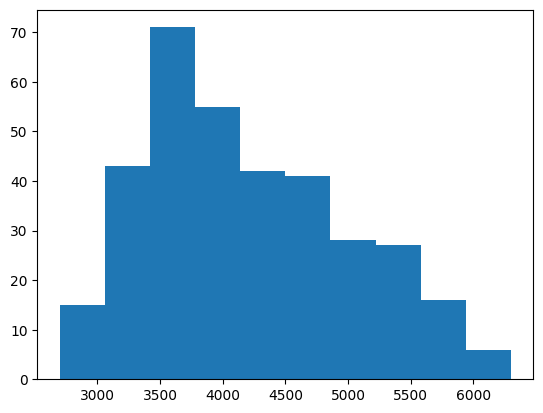

In [36]:
import math
plt.hist(df['body_mass_g'])

b) Bivariate Analysis

Text(0, 0.5, 'Body mass of the penguin')

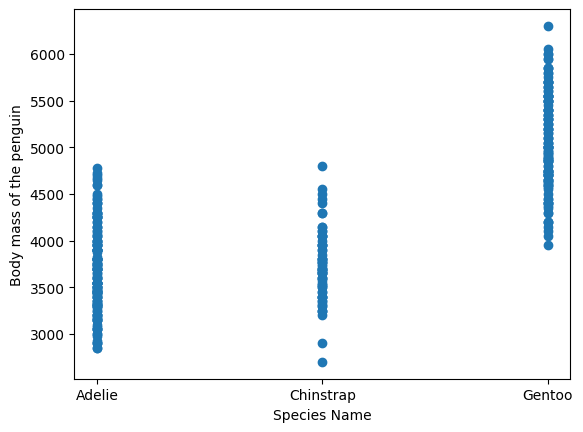

In [25]:
plt.scatter(df.species,df['body_mass_g'])
plt.xlabel('Species Name')
plt.ylabel('Body mass of the penguin')

In [26]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583832,-0.471942
flipper_length_mm,0.656181,-0.583832,1.000000,0.871221
body_mass_g,0.595110,-0.471942,0.871221,1.000000


c) Multivariate Analysis

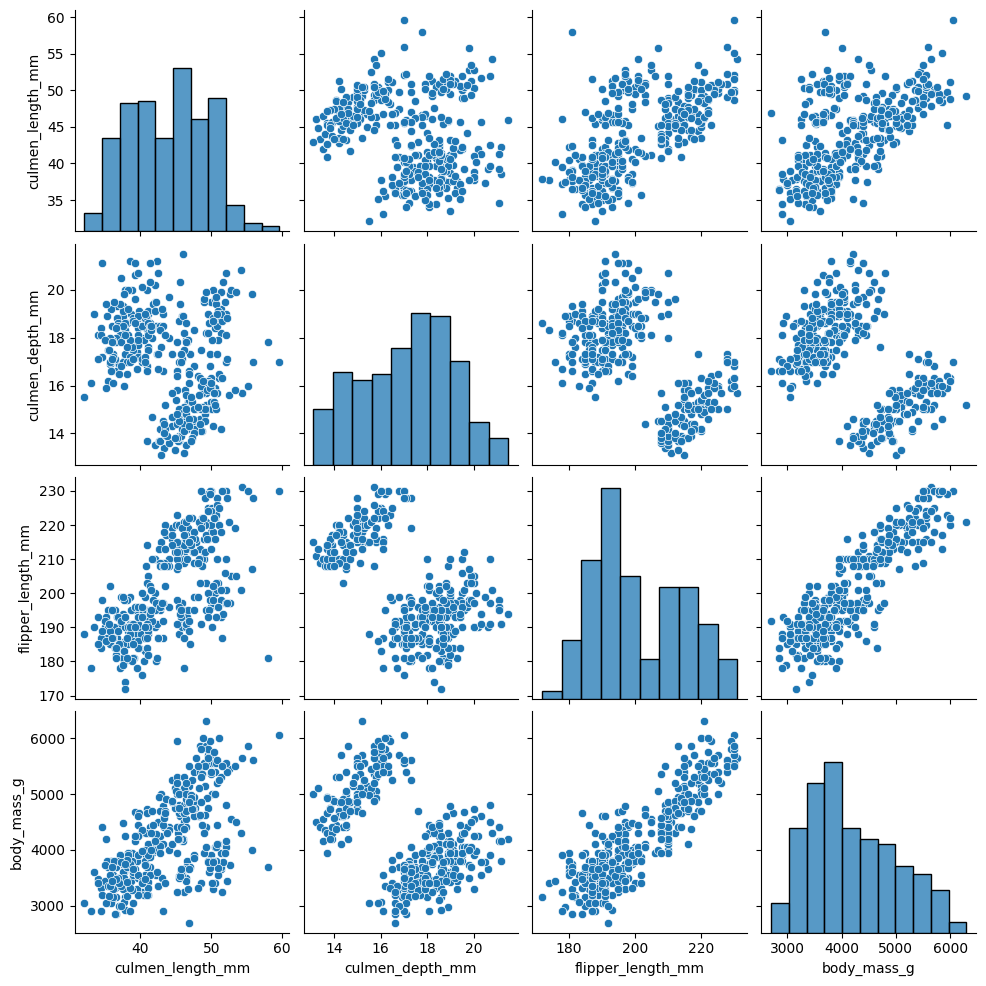

In [28]:
import seaborn as sns
sns.pairplot(df)

4) Perform Descriptive Analysis on Dataset

In [31]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,344.000000,344.000000,344.000000
mean,43.921930,17.152035,200.892442,4200.872093
std,5.459584,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [32]:
df['flipper_length_mm'].median()

197.0

In [33]:
df['culmen_depth_mm'].corr(df['culmen_depth_mm'])

1.0

In [35]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

5)  Check for Missing values and deal with them

In [37]:
df.fillna({'body_mass_g':df['body_mass_g'].median(),'culmen_length_mm	':df['culmen_length_mm'].median(),'culmen_depth_mm':df['culmen_depth_mm'].median()},inplace=True)
df.fillna({'flipper_length_mm':df['flipper_length_mm'].median()},inplace=True)
df.head(7)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,17.3,197.0,4050.0,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE


6) Find the outliers and replace them outliers

In [50]:
from scipy import stats
z_scores=stats.zscore(df['body_mass_g'])
threshold=2
outliers=df[abs(z_scores)>threshold]
print(outliers)

    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
233  Gentoo  Biscoe              48.4             14.6              213.0   
235  Gentoo  Biscoe              49.3             15.7              217.0   
237  Gentoo  Biscoe              49.2             15.2              221.0   
253  Gentoo  Biscoe              59.6             17.0              230.0   
287  Gentoo  Biscoe              49.5             16.2              229.0   
295  Gentoo  Biscoe              48.6             16.0              230.0   
297  Gentoo  Biscoe              51.1             16.3              220.0   
299  Gentoo  Biscoe              45.2             16.4              223.0   
331  Gentoo  Biscoe              49.8             15.9              229.0   
335  Gentoo  Biscoe              55.1             16.0              230.0   
337  Gentoo  Biscoe              48.8             16.2              222.0   

     body_mass_g   sex  
233       5850.0  MALE  
235       5850.0  MALE  


In [52]:
lower_bound=df['body_mass_g'].quantile(0.01)
upper_bound=df['body_mass_g'].quantile(0.99)
df['body_mass_g']=df['body_mass_g'].clip(lower=lower_bound, upper=upper_bound)
df.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.000,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.000,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.000,.
337,Gentoo,Biscoe,48.8,16.2,222.0,5966.245,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.000,FEMALE
339,Gentoo,Biscoe,NaN,17.3,197.0,4050.000,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.000,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.000,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.000,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.000,MALE


7) Check the correlation of independent variables with the target

<ipython-input-60-058a0bc94e47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


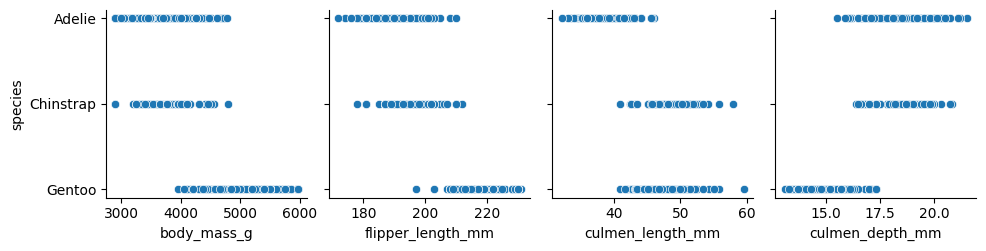

In [60]:
correlation_matrix = df.corr()
target_correlations = correlation_matrix['body_mass_g']
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
sns.pairplot(df, x_vars=sorted_correlations.index[:5],y_vars=['species'])



8) Check for Categorical columns and perform encoding

In [61]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
print(categorical_columns)

Index(['species', 'island', 'sex'], dtype='object')


 9) Split the data into dependent and independent variables

In [69]:
x=df.drop('species', axis=1)
y=df['species']
print("Independent Variables are:\n",x)
print("Dependent Variables are:/n",y)

Independent Variables are:
         island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Torgersen              39.1             18.7              181.0   
1    Torgersen              39.5             17.4              186.0   
2    Torgersen              40.3             18.0              195.0   
3    Torgersen               NaN             17.3              197.0   
4    Torgersen              36.7             19.3              193.0   
..         ...               ...              ...                ...   
339     Biscoe               NaN             17.3              197.0   
340     Biscoe              46.8             14.3              215.0   
341     Biscoe              50.4             15.7              222.0   
342     Biscoe              45.2             14.8              212.0   
343     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  

10) Scaling the data

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[['body_mass_g']])
print(X_scaled)

[[0.27721203]
 [0.29351862]
 [0.11414613]
 [0.37505157]
 [0.17937249]
 [0.24459885]
 [0.23644555]
 [0.57888394]
 [0.18752578]
 [0.44027793]
 [0.13045272]
 [0.26090544]
 [0.09783954]
 [0.29351862]
 [0.4891977 ]
 [0.26090544]
 [0.17937249]
 [0.52181088]
 [0.13860601]
 [0.42397134]
 [0.1630659 ]
 [0.22829226]
 [0.29351862]
 [0.34243839]
 [0.29351862]
 [0.29351862]
 [0.21198567]
 [0.09783954]
 [0.08153295]
 [0.34243839]
 [0.11414613]
 [0.3261318 ]
 [0.13045272]
 [0.3261318 ]
 [0.13860601]
 [0.40766475]
 [0.34243839]
 [0.21198567]
 [0.13045272]
 [0.57073065]
 [0.08153295]
 [0.3261318 ]
 [0.06522636]
 [0.4891977 ]
 [0.03261318]
 [0.55442406]
 [0.17121919]
 [0.02445988]
 [0.17937249]
 [0.40766475]
 [0.19567908]
 [0.45658452]
 [0.17937249]
 [0.37505157]
 [0.        ]
 [0.26090544]
 [0.21198567]
 [0.29351862]
 [0.        ]
 [0.27721203]
 [0.08153295]
 [0.4891977 ]
 [0.22829226]
 [0.37505157]
 [0.        ]
 [0.34243839]
 [0.14675931]
 [0.39135816]
 [0.04891977]
 [0.50550429]
 [0.22829226]
 [0.32

11) Split the data into training and testing

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training:\n",X_train)
print("Testing:\n",X_test)

Training:
         island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
66      Biscoe              35.5             16.2              195.0   
229     Biscoe              46.8             15.4              215.0   
7    Torgersen              39.2             19.6              195.0   
140      Dream              40.2             17.1              193.0   
323     Biscoe              49.1             15.0              228.0   
..         ...               ...              ...                ...   
188      Dream              47.6             18.3              195.0   
71   Torgersen              39.7             18.4              190.0   
106     Biscoe              38.6             17.2              199.0   
270     Biscoe              46.6             14.2              210.0   
102     Biscoe              37.7             16.0              183.0   

     body_mass_g     sex  
66        3350.0  FEMALE  
229       5150.0    MALE  
7         4675.0    MALE  
140       3400.0

12) Check the training and testing data shape

In [82]:
print("Training data shape X_train:", X_train.shape)
print("Testing data shape X_test:", X_test.shape)

Training data shape X_train: (275, 6)
Testing data shape X_test: (69, 6)
